# **Main Pipeline**

---

## **Training preparation**

In [1]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import json
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from modeling.train_eval import train_model, evaluate_model
from modeling.dataset import SignLanguageDataset
from modeling.model import SignLanguageCNN_pooling, SignLanguageSimple_LSTM

In [2]:
DF = 'dataset/train_clean_50_threshhold_25_signs_all_modified_path.csv'

label_mapping = {}
with open('asl-signs/sign_to_prediction_index_map.json', 'r') as f:
    label_mapping = json.load(f)

label_mapping_25 = {}
with open('dataset/label_mapping_25.json', 'r') as f:
    label_mapping_25 = json.load(f)


df_metadata = pd.read_csv(DF)

In [3]:
train_df, temp_df = train_test_split(df_metadata, test_size = 0.2, stratify = df_metadata['sign'], random_state = 99)
val_df, test_df = train_test_split(temp_df, test_size = 0.5, stratify = temp_df['sign'], random_state = 99)

print(f'train: {len(train_df)} sequences')
print(f'val:   {len(val_df)} sequences')
print(f'test:  {len(test_df)} sequences')

train: 8040 sequences
val:   1005 sequences
test:  1006 sequences


In [4]:
train_dataset = SignLanguageDataset(df_metadata = train_df, label_mapping = label_mapping_25)
val_dataset = SignLanguageDataset(df_metadata = val_df, label_mapping = label_mapping_25)
test_dataset = SignLanguageDataset(df_metadata = test_df, label_mapping = label_mapping_25)

In [5]:
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

## **Basic Model**

In [6]:
model = SignLanguageCNN_pooling(num_classes = 25)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loss, train_acc, val_loss, val_acc = train_model(
    model, train_dataloader, val_dataloader, save_path = 'modeling/models/cnn.pt',epoches = 80, learning_rate = 0.001, lr_patience = 3)


Epoch 1/80
------------------------------


Train Loss: 3.0383 | Train Acc: 0.0826
Val Loss:   2.8147 | Val Acc:   0.1184
Learning rate: 0.001000
New best model: Val Loss: 2.8147 Val Acc: 0.1184)

Epoch 2/80
------------------------------


Train Loss: 2.7655 | Train Acc: 0.1321
Val Loss:   2.6196 | Val Acc:   0.1731
Learning rate: 0.001000
New best model: Val Loss: 2.6196 Val Acc: 0.1731)

Epoch 3/80
------------------------------


Train Loss: 2.5540 | Train Acc: 0.1927
Val Loss:   2.4013 | Val Acc:   0.2398
Learning rate: 0.001000
New best model: Val Loss: 2.4013 Val Acc: 0.2398)

Epoch 4/80
------------------------------


Train Loss: 2.3853 | Train Acc: 0.2488
Val Loss:   2.2388 | Val Acc:   0.3045
Learning rate: 0.001000
New best model: Val Loss: 2.2388 Val Acc: 0.3045)

Epoch 5/80
------------------------------


Train Loss: 2.2585 | Train Acc: 0.2910
Val Loss:   2.0725 | Val Acc:   0.3622
Learning rate: 0.001000
New best model: Val Loss: 2.0725 Val Acc: 0.3622)

Epoch 6/80
------------------------------


Train Loss: 2.1434 | Train Acc: 0.3236
Val Loss:   2.0070 | Val Acc:   0.3761
Learning rate: 0.001000
New best model: Val Loss: 2.0070 Val Acc: 0.3761)

Epoch 7/80
------------------------------


Train Loss: 2.0470 | Train Acc: 0.3578
Val Loss:   1.9177 | Val Acc:   0.4159
Learning rate: 0.001000
New best model: Val Loss: 1.9177 Val Acc: 0.4159)

Epoch 8/80
------------------------------


Train Loss: 1.9454 | Train Acc: 0.3894
Val Loss:   1.8324 | Val Acc:   0.4408
Learning rate: 0.001000
New best model: Val Loss: 1.8324 Val Acc: 0.4408)

Epoch 9/80
------------------------------


Train Loss: 1.8629 | Train Acc: 0.4108
Val Loss:   1.7476 | Val Acc:   0.4647
Learning rate: 0.001000
New best model: Val Loss: 1.7476 Val Acc: 0.4647)

Epoch 10/80
------------------------------


Train Loss: 1.7968 | Train Acc: 0.4313
Val Loss:   1.6776 | Val Acc:   0.4886
Learning rate: 0.001000
New best model: Val Loss: 1.6776 Val Acc: 0.4886)

Epoch 11/80
------------------------------


Train Loss: 1.7199 | Train Acc: 0.4542
Val Loss:   1.5568 | Val Acc:   0.5363
Learning rate: 0.001000
New best model: Val Loss: 1.5568 Val Acc: 0.5363)

Epoch 12/80
------------------------------


Train Loss: 1.6447 | Train Acc: 0.4838
Val Loss:   1.5427 | Val Acc:   0.5224
Learning rate: 0.001000
New best model: Val Loss: 1.5427 Val Acc: 0.5224)

Epoch 13/80
------------------------------


Train Loss: 1.5792 | Train Acc: 0.5010
Val Loss:   1.4722 | Val Acc:   0.5463
Learning rate: 0.001000
New best model: Val Loss: 1.4722 Val Acc: 0.5463)

Epoch 14/80
------------------------------


Train Loss: 1.5358 | Train Acc: 0.5137
Val Loss:   1.4787 | Val Acc:   0.5463
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 15/80
------------------------------


Train Loss: 1.4828 | Train Acc: 0.5311
Val Loss:   1.4022 | Val Acc:   0.5552
Learning rate: 0.001000
New best model: Val Loss: 1.4022 Val Acc: 0.5552)

Epoch 16/80
------------------------------


Train Loss: 1.4333 | Train Acc: 0.5470
Val Loss:   1.3034 | Val Acc:   0.6109
Learning rate: 0.001000
New best model: Val Loss: 1.3034 Val Acc: 0.6109)

Epoch 17/80
------------------------------


Train Loss: 1.3988 | Train Acc: 0.5547
Val Loss:   1.3047 | Val Acc:   0.5821
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 18/80
------------------------------


Train Loss: 1.3550 | Train Acc: 0.5654
Val Loss:   1.2465 | Val Acc:   0.6050
Learning rate: 0.001000
New best model: Val Loss: 1.2465 Val Acc: 0.6050)

Epoch 19/80
------------------------------


Train Loss: 1.3231 | Train Acc: 0.5756
Val Loss:   1.2417 | Val Acc:   0.6308
Learning rate: 0.001000
New best model: Val Loss: 1.2417 Val Acc: 0.6308)

Epoch 20/80
------------------------------


Train Loss: 1.2970 | Train Acc: 0.5853
Val Loss:   1.2485 | Val Acc:   0.6159
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 21/80
------------------------------


Train Loss: 1.2720 | Train Acc: 0.5953
Val Loss:   1.2050 | Val Acc:   0.6358
Learning rate: 0.001000
New best model: Val Loss: 1.2050 Val Acc: 0.6358)

Epoch 22/80
------------------------------


Train Loss: 1.2418 | Train Acc: 0.5980
Val Loss:   1.1700 | Val Acc:   0.6438
Learning rate: 0.001000
New best model: Val Loss: 1.1700 Val Acc: 0.6438)

Epoch 23/80
------------------------------


Train Loss: 1.2088 | Train Acc: 0.6107
Val Loss:   1.1812 | Val Acc:   0.6328
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 24/80
------------------------------


Train Loss: 1.1851 | Train Acc: 0.6147
Val Loss:   1.1469 | Val Acc:   0.6537
Learning rate: 0.001000
New best model: Val Loss: 1.1469 Val Acc: 0.6537)

Epoch 25/80
------------------------------


Train Loss: 1.1679 | Train Acc: 0.6246
Val Loss:   1.1391 | Val Acc:   0.6567
Learning rate: 0.001000
New best model: Val Loss: 1.1391 Val Acc: 0.6567)

Epoch 26/80
------------------------------


Train Loss: 1.1551 | Train Acc: 0.6238
Val Loss:   1.1054 | Val Acc:   0.6746
Learning rate: 0.001000
New best model: Val Loss: 1.1054 Val Acc: 0.6746)

Epoch 27/80
------------------------------


Train Loss: 1.1280 | Train Acc: 0.6323
Val Loss:   1.1109 | Val Acc:   0.6537
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 28/80
------------------------------


Train Loss: 1.1186 | Train Acc: 0.6414
Val Loss:   1.0759 | Val Acc:   0.6687
Learning rate: 0.001000
New best model: Val Loss: 1.0759 Val Acc: 0.6687)

Epoch 29/80
------------------------------


Train Loss: 1.0908 | Train Acc: 0.6449
Val Loss:   1.0999 | Val Acc:   0.6597
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 30/80
------------------------------


Train Loss: 1.0739 | Train Acc: 0.6517
Val Loss:   1.0777 | Val Acc:   0.6826
Learning rate: 0.001000
No improvement for 2 epoches

Epoch 31/80
------------------------------


Train Loss: 1.0535 | Train Acc: 0.6531
Val Loss:   1.0701 | Val Acc:   0.6716
Learning rate: 0.001000
New best model: Val Loss: 1.0701 Val Acc: 0.6716)

Epoch 32/80
------------------------------


Train Loss: 1.0483 | Train Acc: 0.6607
Val Loss:   1.0267 | Val Acc:   0.6806
Learning rate: 0.001000
New best model: Val Loss: 1.0267 Val Acc: 0.6806)

Epoch 33/80
------------------------------


Train Loss: 1.0295 | Train Acc: 0.6649
Val Loss:   1.0714 | Val Acc:   0.6806
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 34/80
------------------------------


Train Loss: 1.0296 | Train Acc: 0.6673
Val Loss:   1.0390 | Val Acc:   0.6846
Learning rate: 0.001000
No improvement for 2 epoches

Epoch 35/80
------------------------------


Train Loss: 1.0061 | Train Acc: 0.6733
Val Loss:   1.0614 | Val Acc:   0.6846
Learning rate: 0.001000
No improvement for 3 epoches

Epoch 36/80
------------------------------


Train Loss: 1.0031 | Train Acc: 0.6713
Val Loss:   1.0462 | Val Acc:   0.6836
Learning rate: 0.000500
No improvement for 4 epoches

Epoch 37/80
------------------------------


Train Loss: 0.9129 | Train Acc: 0.7039
Val Loss:   0.9952 | Val Acc:   0.7035
Learning rate: 0.000500
New best model: Val Loss: 0.9952 Val Acc: 0.7035)

Epoch 38/80
------------------------------


Train Loss: 0.8790 | Train Acc: 0.7103
Val Loss:   0.9768 | Val Acc:   0.6995
Learning rate: 0.000500
New best model: Val Loss: 0.9768 Val Acc: 0.6995)

Epoch 39/80
------------------------------


Train Loss: 0.8642 | Train Acc: 0.7102
Val Loss:   0.9788 | Val Acc:   0.7005
Learning rate: 0.000500
No improvement for 1 epoches

Epoch 40/80
------------------------------


Train Loss: 0.8566 | Train Acc: 0.7131
Val Loss:   0.9481 | Val Acc:   0.7055
Learning rate: 0.000500
New best model: Val Loss: 0.9481 Val Acc: 0.7055)

Epoch 41/80
------------------------------


Train Loss: 0.8700 | Train Acc: 0.7146
Val Loss:   0.9855 | Val Acc:   0.7104
Learning rate: 0.000500
No improvement for 1 epoches

Epoch 42/80
------------------------------


Train Loss: 0.8556 | Train Acc: 0.7177
Val Loss:   0.9506 | Val Acc:   0.7134
Learning rate: 0.000500
No improvement for 2 epoches

Epoch 43/80
------------------------------


Train Loss: 0.8364 | Train Acc: 0.7252
Val Loss:   0.9602 | Val Acc:   0.7174
Learning rate: 0.000500
No improvement for 3 epoches

Epoch 44/80
------------------------------


Train Loss: 0.8472 | Train Acc: 0.7189
Val Loss:   0.9648 | Val Acc:   0.7055
Learning rate: 0.000250
No improvement for 4 epoches

Epoch 45/80
------------------------------


Train Loss: 0.7984 | Train Acc: 0.7374
Val Loss:   0.9223 | Val Acc:   0.7323
Learning rate: 0.000250
New best model: Val Loss: 0.9223 Val Acc: 0.7323)

Epoch 46/80
------------------------------


Train Loss: 0.7684 | Train Acc: 0.7448
Val Loss:   0.9219 | Val Acc:   0.7284
Learning rate: 0.000250
New best model: Val Loss: 0.9219 Val Acc: 0.7284)

Epoch 47/80
------------------------------


Train Loss: 0.7648 | Train Acc: 0.7455
Val Loss:   0.9205 | Val Acc:   0.7234
Learning rate: 0.000250
New best model: Val Loss: 0.9205 Val Acc: 0.7234)

Epoch 48/80
------------------------------


Train Loss: 0.7672 | Train Acc: 0.7440
Val Loss:   0.9375 | Val Acc:   0.7134
Learning rate: 0.000250
No improvement for 1 epoches

Epoch 49/80
------------------------------


Train Loss: 0.7540 | Train Acc: 0.7428
Val Loss:   0.9155 | Val Acc:   0.7254
Learning rate: 0.000250
New best model: Val Loss: 0.9155 Val Acc: 0.7254)

Epoch 50/80
------------------------------


Train Loss: 0.7518 | Train Acc: 0.7474
Val Loss:   0.9404 | Val Acc:   0.7204
Learning rate: 0.000250
No improvement for 1 epoches

Epoch 51/80
------------------------------


Train Loss: 0.7585 | Train Acc: 0.7478
Val Loss:   0.9125 | Val Acc:   0.7264
Learning rate: 0.000250
New best model: Val Loss: 0.9125 Val Acc: 0.7264)

Epoch 52/80
------------------------------


Train Loss: 0.7485 | Train Acc: 0.7489
Val Loss:   0.9123 | Val Acc:   0.7184
Learning rate: 0.000250
New best model: Val Loss: 0.9123 Val Acc: 0.7184)

Epoch 53/80
------------------------------


Train Loss: 0.7476 | Train Acc: 0.7517
Val Loss:   0.9067 | Val Acc:   0.7244
Learning rate: 0.000250
New best model: Val Loss: 0.9067 Val Acc: 0.7244)

Epoch 54/80
------------------------------


Train Loss: 0.7367 | Train Acc: 0.7558
Val Loss:   0.9058 | Val Acc:   0.7264
Learning rate: 0.000250
New best model: Val Loss: 0.9058 Val Acc: 0.7264)

Epoch 55/80
------------------------------


Train Loss: 0.7199 | Train Acc: 0.7611
Val Loss:   0.9232 | Val Acc:   0.7214
Learning rate: 0.000250
No improvement for 1 epoches

Epoch 56/80
------------------------------


Train Loss: 0.7412 | Train Acc: 0.7500
Val Loss:   0.9163 | Val Acc:   0.7254
Learning rate: 0.000250
No improvement for 2 epoches

Epoch 57/80
------------------------------


Train Loss: 0.7146 | Train Acc: 0.7600
Val Loss:   0.9129 | Val Acc:   0.7294
Learning rate: 0.000250
No improvement for 3 epoches

Epoch 58/80
------------------------------


Train Loss: 0.7227 | Train Acc: 0.7557
Val Loss:   0.9221 | Val Acc:   0.7264
Learning rate: 0.000125
No improvement for 4 epoches

Epoch 59/80
------------------------------


Train Loss: 0.6914 | Train Acc: 0.7724
Val Loss:   0.8993 | Val Acc:   0.7303
Learning rate: 0.000125
New best model: Val Loss: 0.8993 Val Acc: 0.7303)

Epoch 60/80
------------------------------


Train Loss: 0.7007 | Train Acc: 0.7675
Val Loss:   0.9077 | Val Acc:   0.7284
Learning rate: 0.000125
No improvement for 1 epoches

Epoch 61/80
------------------------------


Train Loss: 0.6735 | Train Acc: 0.7724
Val Loss:   0.9082 | Val Acc:   0.7244
Learning rate: 0.000125
No improvement for 2 epoches

Epoch 62/80
------------------------------


Train Loss: 0.6891 | Train Acc: 0.7692
Val Loss:   0.9128 | Val Acc:   0.7224
Learning rate: 0.000125
No improvement for 3 epoches

Epoch 63/80
------------------------------


Train Loss: 0.6795 | Train Acc: 0.7754
Val Loss:   0.9016 | Val Acc:   0.7294
Learning rate: 0.000063
No improvement for 4 epoches

Epoch 64/80
------------------------------


Train Loss: 0.6749 | Train Acc: 0.7729
Val Loss:   0.9054 | Val Acc:   0.7264
Learning rate: 0.000063
No improvement for 5 epoches

Epoch 65/80
------------------------------


Train Loss: 0.6660 | Train Acc: 0.7764
Val Loss:   0.9018 | Val Acc:   0.7274
Learning rate: 0.000063
No improvement for 6 epoches

Epoch 66/80
------------------------------


Train Loss: 0.6729 | Train Acc: 0.7757
Val Loss:   0.8961 | Val Acc:   0.7323
Learning rate: 0.000063
New best model: Val Loss: 0.8961 Val Acc: 0.7323)

Epoch 67/80
------------------------------


Train Loss: 0.6623 | Train Acc: 0.7792
Val Loss:   0.9026 | Val Acc:   0.7274
Learning rate: 0.000063
No improvement for 1 epoches

Epoch 68/80
------------------------------


Train Loss: 0.6585 | Train Acc: 0.7765
Val Loss:   0.9008 | Val Acc:   0.7363
Learning rate: 0.000063
No improvement for 2 epoches

Epoch 69/80
------------------------------


Train Loss: 0.6615 | Train Acc: 0.7826
Val Loss:   0.8969 | Val Acc:   0.7363
Learning rate: 0.000063
No improvement for 3 epoches

Epoch 70/80
------------------------------


Train Loss: 0.6708 | Train Acc: 0.7769
Val Loss:   0.9038 | Val Acc:   0.7353
Learning rate: 0.000031
No improvement for 4 epoches

Epoch 71/80
------------------------------


Train Loss: 0.6557 | Train Acc: 0.7813
Val Loss:   0.9035 | Val Acc:   0.7284
Learning rate: 0.000031
No improvement for 5 epoches

Epoch 72/80
------------------------------


Train Loss: 0.6585 | Train Acc: 0.7801
Val Loss:   0.9038 | Val Acc:   0.7254
Learning rate: 0.000031
No improvement for 6 epoches

Epoch 73/80
------------------------------


Train Loss: 0.6440 | Train Acc: 0.7876
Val Loss:   0.9037 | Val Acc:   0.7353
Learning rate: 0.000031
No improvement for 7 epoches

Epoch 74/80
------------------------------


Train Loss: 0.6494 | Train Acc: 0.7837
Val Loss:   0.8978 | Val Acc:   0.7313
Learning rate: 0.000016
No improvement for 8 epoches

Epoch 75/80
------------------------------


Train Loss: 0.6605 | Train Acc: 0.7767
Val Loss:   0.8966 | Val Acc:   0.7333
Learning rate: 0.000016
No improvement for 9 epoches

Epoch 76/80
------------------------------


Train Loss: 0.6458 | Train Acc: 0.7830
Val Loss:   0.8963 | Val Acc:   0.7313
Learning rate: 0.000016
No improvement for 10 epoches

Early stopping at epoch 76

Loaded best model from epoch 66

Training complete
Best Val Loss: 0.8961
Best Val Acc: 0.7323


## **Challenger model**

In [7]:
model2 = SignLanguageSimple_LSTM(num_classes = 25)
train_loss2, train_acc2, val_loss2, val_acc2 = train_model(
    model2, train_dataloader, val_dataloader, save_path = 'modeling/models/lstm.pt', epoches=50, learning_rate = 0.001, lr_patience = 5)


Epoch 1/50
------------------------------


Train Loss: 2.8032 | Train Acc: 0.1504
Val Loss:   2.5624 | Val Acc:   0.2348
Learning rate: 0.001000
New best model: Val Loss: 2.5624 Val Acc: 0.2348)

Epoch 2/50
------------------------------


Train Loss: 2.4001 | Train Acc: 0.2678
Val Loss:   2.2926 | Val Acc:   0.2975
Learning rate: 0.001000
New best model: Val Loss: 2.2926 Val Acc: 0.2975)

Epoch 3/50
------------------------------


Train Loss: 2.1531 | Train Acc: 0.3336
Val Loss:   2.0271 | Val Acc:   0.3811
Learning rate: 0.001000
New best model: Val Loss: 2.0271 Val Acc: 0.3811)

Epoch 4/50
------------------------------


Train Loss: 1.9640 | Train Acc: 0.3920
Val Loss:   1.9003 | Val Acc:   0.4159
Learning rate: 0.001000
New best model: Val Loss: 1.9003 Val Acc: 0.4159)

Epoch 5/50
------------------------------


Train Loss: 1.8362 | Train Acc: 0.4246
Val Loss:   1.8071 | Val Acc:   0.4537
Learning rate: 0.001000
New best model: Val Loss: 1.8071 Val Acc: 0.4537)

Epoch 6/50
------------------------------


Train Loss: 1.7145 | Train Acc: 0.4629
Val Loss:   1.6743 | Val Acc:   0.4836
Learning rate: 0.001000
New best model: Val Loss: 1.6743 Val Acc: 0.4836)

Epoch 7/50
------------------------------


Train Loss: 1.6170 | Train Acc: 0.4961
Val Loss:   1.6143 | Val Acc:   0.5005
Learning rate: 0.001000
New best model: Val Loss: 1.6143 Val Acc: 0.5005)

Epoch 8/50
------------------------------


Train Loss: 1.5367 | Train Acc: 0.5169
Val Loss:   1.6329 | Val Acc:   0.5104
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 9/50
------------------------------


Train Loss: 1.4865 | Train Acc: 0.5386
Val Loss:   1.4963 | Val Acc:   0.5333
Learning rate: 0.001000
New best model: Val Loss: 1.4963 Val Acc: 0.5333)

Epoch 10/50
------------------------------


Train Loss: 1.4140 | Train Acc: 0.5566
Val Loss:   1.4951 | Val Acc:   0.5313
Learning rate: 0.001000
New best model: Val Loss: 1.4951 Val Acc: 0.5313)

Epoch 11/50
------------------------------


Train Loss: 1.3833 | Train Acc: 0.5664
Val Loss:   1.4004 | Val Acc:   0.5602
Learning rate: 0.001000
New best model: Val Loss: 1.4004 Val Acc: 0.5602)

Epoch 12/50
------------------------------


Train Loss: 1.3453 | Train Acc: 0.5731
Val Loss:   1.3903 | Val Acc:   0.5592
Learning rate: 0.001000
New best model: Val Loss: 1.3903 Val Acc: 0.5592)

Epoch 13/50
------------------------------


Train Loss: 1.2870 | Train Acc: 0.5948
Val Loss:   1.3855 | Val Acc:   0.5781
Learning rate: 0.001000
New best model: Val Loss: 1.3855 Val Acc: 0.5781)

Epoch 14/50
------------------------------


Train Loss: 1.2637 | Train Acc: 0.6037
Val Loss:   1.3397 | Val Acc:   0.5751
Learning rate: 0.001000
New best model: Val Loss: 1.3397 Val Acc: 0.5751)

Epoch 15/50
------------------------------


Train Loss: 1.2227 | Train Acc: 0.6113
Val Loss:   1.2950 | Val Acc:   0.5831
Learning rate: 0.001000
New best model: Val Loss: 1.2950 Val Acc: 0.5831)

Epoch 16/50
------------------------------


Train Loss: 1.1941 | Train Acc: 0.6192
Val Loss:   1.3179 | Val Acc:   0.5980
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 17/50
------------------------------


Train Loss: 1.1723 | Train Acc: 0.6269
Val Loss:   1.3280 | Val Acc:   0.5851
Learning rate: 0.001000
No improvement for 2 epoches

Epoch 18/50
------------------------------


Train Loss: 1.1412 | Train Acc: 0.6366
Val Loss:   1.2749 | Val Acc:   0.6000
Learning rate: 0.001000
New best model: Val Loss: 1.2749 Val Acc: 0.6000)

Epoch 19/50
------------------------------


Train Loss: 1.1144 | Train Acc: 0.6455
Val Loss:   1.3471 | Val Acc:   0.5731
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 20/50
------------------------------


Train Loss: 1.0840 | Train Acc: 0.6567
Val Loss:   1.2221 | Val Acc:   0.6209
Learning rate: 0.001000
New best model: Val Loss: 1.2221 Val Acc: 0.6209)

Epoch 21/50
------------------------------


Train Loss: 1.0770 | Train Acc: 0.6575
Val Loss:   1.2605 | Val Acc:   0.6040
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 22/50
------------------------------


Train Loss: 1.0415 | Train Acc: 0.6670
Val Loss:   1.2336 | Val Acc:   0.6119
Learning rate: 0.001000
No improvement for 2 epoches

Epoch 23/50
------------------------------


Train Loss: 1.0144 | Train Acc: 0.6728
Val Loss:   1.1986 | Val Acc:   0.6348
Learning rate: 0.001000
New best model: Val Loss: 1.1986 Val Acc: 0.6348)

Epoch 24/50
------------------------------


Train Loss: 0.9946 | Train Acc: 0.6813
Val Loss:   1.2187 | Val Acc:   0.6179
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 25/50
------------------------------


Train Loss: 0.9889 | Train Acc: 0.6816
Val Loss:   1.1641 | Val Acc:   0.6358
Learning rate: 0.001000
New best model: Val Loss: 1.1641 Val Acc: 0.6358)

Epoch 26/50
------------------------------


Train Loss: 0.9639 | Train Acc: 0.6872
Val Loss:   1.2723 | Val Acc:   0.6139
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 27/50
------------------------------


Train Loss: 0.9418 | Train Acc: 0.6935
Val Loss:   1.1953 | Val Acc:   0.6249
Learning rate: 0.001000
No improvement for 2 epoches

Epoch 28/50
------------------------------


Train Loss: 0.9197 | Train Acc: 0.7001
Val Loss:   1.1481 | Val Acc:   0.6478
Learning rate: 0.001000
New best model: Val Loss: 1.1481 Val Acc: 0.6478)

Epoch 29/50
------------------------------


Train Loss: 0.9074 | Train Acc: 0.7032
Val Loss:   1.1676 | Val Acc:   0.6408
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 30/50
------------------------------


Train Loss: 0.8910 | Train Acc: 0.7077
Val Loss:   1.1982 | Val Acc:   0.6219
Learning rate: 0.001000
No improvement for 2 epoches

Epoch 31/50
------------------------------


Train Loss: 0.8618 | Train Acc: 0.7236
Val Loss:   1.1932 | Val Acc:   0.6368
Learning rate: 0.001000
No improvement for 3 epoches

Epoch 32/50
------------------------------


Train Loss: 0.8472 | Train Acc: 0.7224
Val Loss:   1.1888 | Val Acc:   0.6388
Learning rate: 0.001000
No improvement for 4 epoches

Epoch 33/50
------------------------------


Train Loss: 0.8492 | Train Acc: 0.7260
Val Loss:   1.1370 | Val Acc:   0.6557
Learning rate: 0.001000
New best model: Val Loss: 1.1370 Val Acc: 0.6557)

Epoch 34/50
------------------------------


Train Loss: 0.8236 | Train Acc: 0.7321
Val Loss:   1.1490 | Val Acc:   0.6498
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 35/50
------------------------------


Train Loss: 0.8293 | Train Acc: 0.7305
Val Loss:   1.1966 | Val Acc:   0.6428
Learning rate: 0.001000
No improvement for 2 epoches

Epoch 36/50
------------------------------


Train Loss: 0.8043 | Train Acc: 0.7311
Val Loss:   1.2395 | Val Acc:   0.6249
Learning rate: 0.001000
No improvement for 3 epoches

Epoch 37/50
------------------------------


Train Loss: 0.7859 | Train Acc: 0.7363
Val Loss:   1.1722 | Val Acc:   0.6468
Learning rate: 0.001000
No improvement for 4 epoches

Epoch 38/50
------------------------------


Train Loss: 0.7754 | Train Acc: 0.7412
Val Loss:   1.1206 | Val Acc:   0.6647
Learning rate: 0.001000
New best model: Val Loss: 1.1206 Val Acc: 0.6647)

Epoch 39/50
------------------------------


Train Loss: 0.7638 | Train Acc: 0.7425
Val Loss:   1.2097 | Val Acc:   0.6378
Learning rate: 0.001000
No improvement for 1 epoches

Epoch 40/50
------------------------------


Train Loss: 0.7433 | Train Acc: 0.7562
Val Loss:   1.1775 | Val Acc:   0.6398
Learning rate: 0.001000
No improvement for 2 epoches

Epoch 41/50
------------------------------


Train Loss: 0.7354 | Train Acc: 0.7517
Val Loss:   1.1849 | Val Acc:   0.6776
Learning rate: 0.001000
No improvement for 3 epoches

Epoch 42/50
------------------------------


Train Loss: 0.7208 | Train Acc: 0.7583
Val Loss:   1.1868 | Val Acc:   0.6507
Learning rate: 0.001000
No improvement for 4 epoches

Epoch 43/50
------------------------------


Train Loss: 0.7145 | Train Acc: 0.7600
Val Loss:   1.1975 | Val Acc:   0.6478
Learning rate: 0.001000
No improvement for 5 epoches

Epoch 44/50
------------------------------


Train Loss: 0.7249 | Train Acc: 0.7556
Val Loss:   1.1560 | Val Acc:   0.6557
Learning rate: 0.000500
No improvement for 6 epoches

Epoch 45/50
------------------------------


Train Loss: 0.5949 | Train Acc: 0.8012
Val Loss:   1.0936 | Val Acc:   0.6796
Learning rate: 0.000500
New best model: Val Loss: 1.0936 Val Acc: 0.6796)

Epoch 46/50
------------------------------


Train Loss: 0.5595 | Train Acc: 0.8117
Val Loss:   1.0912 | Val Acc:   0.6776
Learning rate: 0.000500
New best model: Val Loss: 1.0912 Val Acc: 0.6776)

Epoch 47/50
------------------------------


Train Loss: 0.5554 | Train Acc: 0.8124
Val Loss:   1.1034 | Val Acc:   0.6856
Learning rate: 0.000500
No improvement for 1 epoches

Epoch 48/50
------------------------------


Train Loss: 0.5345 | Train Acc: 0.8214
Val Loss:   1.0821 | Val Acc:   0.6866
Learning rate: 0.000500
New best model: Val Loss: 1.0821 Val Acc: 0.6866)

Epoch 49/50
------------------------------


Train Loss: 0.5384 | Train Acc: 0.8204
Val Loss:   1.1245 | Val Acc:   0.6846
Learning rate: 0.000500
No improvement for 1 epoches

Epoch 50/50
------------------------------


Train Loss: 0.5217 | Train Acc: 0.8241
Val Loss:   1.1116 | Val Acc:   0.6796
Learning rate: 0.000500
No improvement for 2 epoches

Loaded best model from epoch 48

Training complete
Best Val Loss: 1.0821
Best Val Acc: 0.6866


In [6]:
'''
import matplotlib.pyplot as plt

# cnn
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('CNN Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.legend()
plt.title('CNN Accuracy')

plt.tight_layout()
plt.show()

# lstm
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss2, label='Train Loss')
plt.plot(val_loss2, label='Val Loss')
plt.legend()
plt.title('LSTM Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc2, label='Train Acc')
plt.plot(val_acc2, label='Val Acc')
plt.legend()
plt.title('LSTM Accuracy')

plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n# cnn\nplt.figure(figsize=(12, 4))\n\nplt.subplot(1, 2, 1)\nplt.plot(train_loss, label='Train Loss')\nplt.plot(val_loss, label='Val Loss')\nplt.legend()\nplt.title('CNN Loss')\n\nplt.subplot(1, 2, 2)\nplt.plot(train_acc, label='Train Acc')\nplt.plot(val_acc, label='Val Acc')\nplt.legend()\nplt.title('CNN Accuracy')\n\nplt.tight_layout()\nplt.show()\n\n# lstm\nplt.figure(figsize=(12, 4))\n\nplt.subplot(1, 2, 1)\nplt.plot(train_loss2, label='Train Loss')\nplt.plot(val_loss2, label='Val Loss')\nplt.legend()\nplt.title('LSTM Loss')\n\nplt.subplot(1, 2, 2)\nplt.plot(train_acc2, label='Train Acc')\nplt.plot(val_acc2, label='Val Acc')\nplt.legend()\nplt.title('LSTM Accuracy')\n\nplt.tight_layout()\nplt.show()\n"

## **Evaluation, Reflection**

- Overall during many training runs (which aren't present in the notebook) the basic 1d cnn model almost always performed better than my challenger lstm model, tried a few hyperparameters for both of the models
- Kept both models really lightweight, both has less than 1 million parameters

- The basic model achieved 73% accuracy on the dataset, which consisted of 25 signs and all of their sequences
- The challenger model achieved 68 - 69% accuracy on same dataset

- As the confusion matrix shows there were some signs which were really hard to predict especially the signs:
    - awake - 0
    - wake - 23 

- I think if I were to train on a larger dataset (the current one had around 10K sequences so around 1/10th of the original),
the challenger model would outperform the basic one because it scales better with larger dataset
    - obviously would need to increase parameter size


Testing: 100%|██████████| 32/32 [00:00<00:00, 61.20it/s]


Accuracy:  0.7237
Precision: 0.7331
Recall:    0.7237
F1-Score:  0.7192


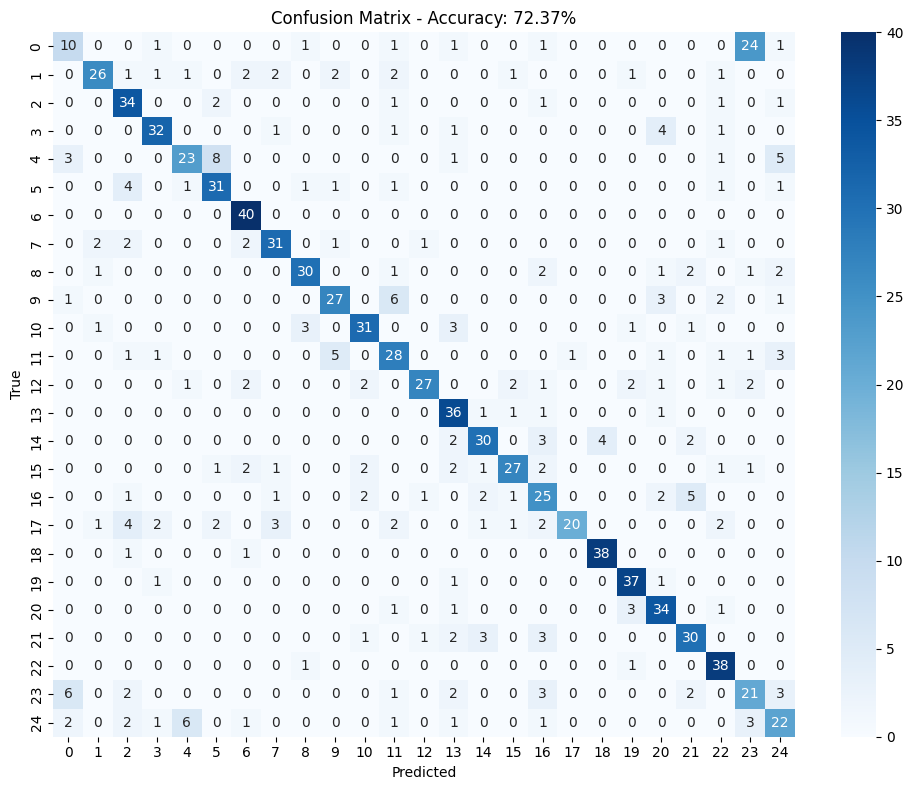

Per class breakdown:
                 precision    recall  f1-score   support

      awake (0)       0.45      0.25      0.32        40
      brown (1)       0.84      0.65      0.73        40
        bye (2)       0.65      0.85      0.74        40
        cat (3)       0.82      0.80      0.81        40
        cow (4)       0.72      0.56      0.63        41
     donkey (5)       0.70      0.76      0.73        41
       duck (6)       0.80      1.00      0.89        40
    fireman (7)       0.79      0.78      0.78        40
      first (8)       0.83      0.75      0.79        40
       hear (9)       0.75      0.68      0.71        40
      lips (10)       0.82      0.78      0.79        40
    listen (11)       0.61      0.67      0.64        42
      look (12)       0.90      0.66      0.76        41
      make (13)       0.68      0.90      0.77        40
     mouse (14)       0.79      0.73      0.76        41
      nuts (15)       0.82      0.68      0.74        40
       pe

In [7]:
model_cnn = SignLanguageCNN_pooling(num_classes=25)
model_cnn.load_state_dict(torch.load('modeling/models/cnn.pt'))

accuracy, precision, recall, f1 = evaluate_model(model_cnn, test_dataloader, label_mapping_25)

Testing: 100%|██████████| 32/32 [00:00<00:00, 47.38it/s]


Accuracy:  0.6849
Precision: 0.6879
Recall:    0.6849
F1-Score:  0.6820


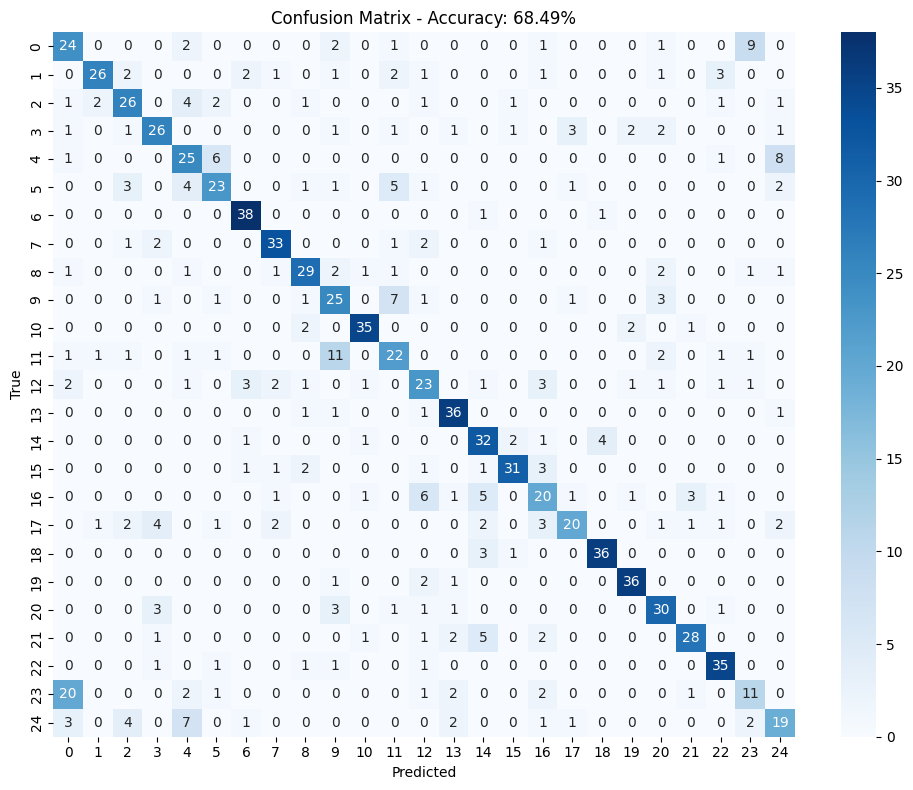

Per class breakdown:
                 precision    recall  f1-score   support

      awake (0)       0.44      0.60      0.51        40
      brown (1)       0.87      0.65      0.74        40
        bye (2)       0.65      0.65      0.65        40
        cat (3)       0.68      0.65      0.67        40
        cow (4)       0.53      0.61      0.57        41
     donkey (5)       0.64      0.56      0.60        41
       duck (6)       0.83      0.95      0.88        40
    fireman (7)       0.80      0.82      0.81        40
      first (8)       0.74      0.72      0.73        40
       hear (9)       0.51      0.62      0.56        40
      lips (10)       0.88      0.88      0.88        40
    listen (11)       0.54      0.52      0.53        42
      look (12)       0.53      0.56      0.55        41
      make (13)       0.78      0.90      0.84        40
     mouse (14)       0.64      0.78      0.70        41
      nuts (15)       0.86      0.78      0.82        40
       pe

In [8]:
model_lstm = SignLanguageSimple_LSTM(num_classes=25)
model_lstm.load_state_dict(torch.load('modeling/models/lstm.pt'))

accuracy2, precision2, recall2, f12 = evaluate_model(model_lstm, test_dataloader, label_mapping_25)